In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_bvp
from scipy.optimize import root_scalar



       message: The maximum number of mesh nodes is exceeded.
       success: False
        status: 1
             x: [-2.000e+00 -1.996e+00 ...  1.996e+00  2.000e+00]
           sol: <scipy.interpolate._interpolate.PPoly object at 0x7fcf93126e30>
             p: [ 5.297e+04]
             y: [[ 0.000e+00  2.962e-09 ... -3.208e-09  8.458e-27]
                 [ 1.000e-06  2.725e-07 ...  2.952e-07  1.083e-06]]
            yp: [[ 1.000e-06  2.725e-07 ...  2.952e-07  1.083e-06]
                 [-0.000e+00 -3.126e-04 ...  3.386e-04 -8.926e-22]]
 rms_residuals: [ 3.035e-06  1.381e-06 ...  1.496e-06  3.287e-06]
         niter: 1


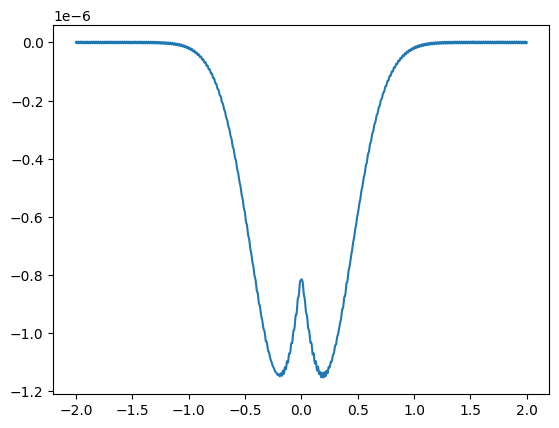

In [124]:
def V(x, V0=10, a=1):
    return np.sign(np.abs(x) - a/2) * (V0/2) + V0/2

def V(x):
    return 100*x**2/2


def dY_dx(x, Y, p):
    E = p[0]
    return [Y[1], -2*(E - V(x))*Y[0]]

def bc(Ya, Yb, p):
    return np.array([Ya[0], Yb[0], Ya[1] - 1e-6])

x = np.linspace(-2, 2, 1001)

Y0 = np.zeros([2, x.size])
Y0[0,int(x.size/2)] = .01
# Y0.shape

res = solve_bvp(dY_dx, bc, x, Y0, p=[10], max_nodes=100, verbose=0)
print(res)
plt.plot(res.x, res.y[0])
# plt.plot(res.x, V(res.x))

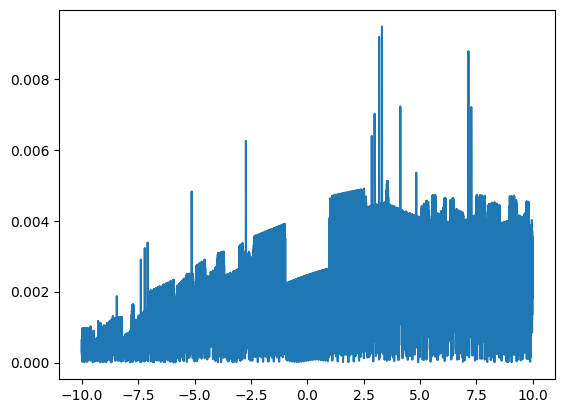

In [105]:
plt.plot(res.x[:-1], res.rms_residuals)

(24,)
0.0 0.0 0.001


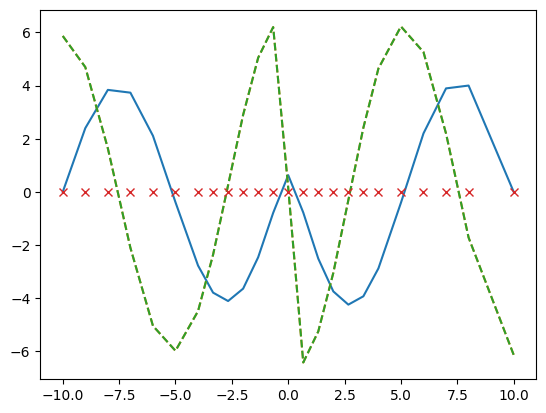

In [88]:
res.x.shape
plt.plot(res.x, 4*res.y[0]/res.y[0].max())
plt.plot(res.x, 4*res.y[1]/res.yp[1].max(), '--')

plt.plot(res.x, 4*res.y[1]/res.yp[1].max(), '--')
y1p = -2*(res.p[0]-V(res.x))*res.y[0]
plt.plot(res.x, y1p, 'x')
print(res.x.shape)
print(res.y[0, 0], res.y[0, -1], res.y[1, 0])

(24,)
0.0 0.0 0.001


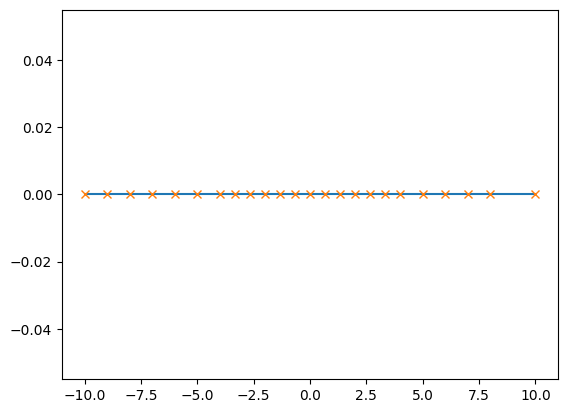

In [89]:
res.x.shape
# plt.plot(res.x, res.y[0])
# plt.plot(res.x, res.yp[1], '--')

# plt.plot(res.x, res.y[1], '--')
y1p = -2*(res.p[0]-V(res.x))*res.y[0]
# plt.plot(res.x, y1p, 'x')
plt.plot(res.x, res.yp[1]-y1p)
plt.plot(res.x, res.yp[0]-res.y[1], 'x')
print(res.x.shape)
print(res.y[0, 0], res.y[0, -1], res.y[1, 0])

In [30]:
solns = [solve_bvp(dY_dx, bc, x, Y0, p=[Ei]) for Ei in Elist]
# solns
for i, soln in enumerate(solns):
    print(f"n = {i+1}:", "success = {success}; niter = {niter}".format(**soln))

/home/zqw/.conda/envs/sci/lib/python3.10/site-packages/scipy/integrate/_bvp.py:1093: RuntimeWarning: invalid value encountered in divide
  r_middle = 1.5 * col_res / h
/home/zqw/.conda/envs/sci/lib/python3.10/site-packages/scipy/integrate/_bvp.py:591: RuntimeWarning: invalid value encountered in divide
  slope = (y[:, 1:] - y[:, :-1]) / h


n = 1: success = True; niter = 3
n = 2: success = False; niter = 407
n = 3: success = False; niter = 157
n = 4: success = False; niter = 148


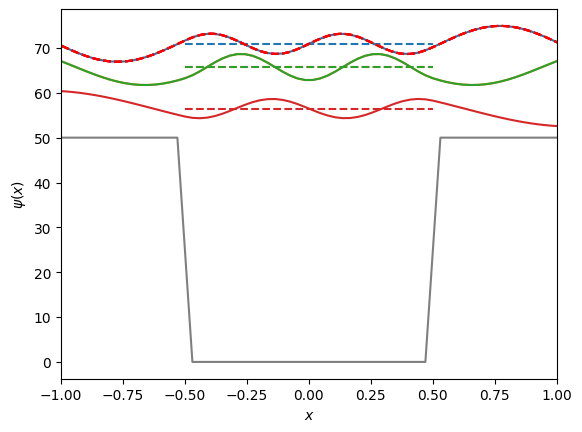

In [31]:
x_plot = np.linspace(x.min(), x.max(), 100)
plt.plot(x_plot, V(x_plot), c='k', alpha=0.5)
for soln in solns:
    y_plot = soln.sol(x_plot)[0]
    l = plt.plot(x_plot, 4 * y_plot / y_plot.max() + soln.p[0])
    plt.plot(res.x, 4*res.y[0]/res.y[0].max()+ res.p, ls='--', color='r')
    plt.axhline(soln.p[0], xmin=0.25, xmax=0.75, ls='--', c=l[0].get_color())
plt.axis(xmin=-1, xmax=1)
plt.xlabel(r'$x$')
plt.ylabel(r'$\psi(x)$')
plt.show()

In [82]:
from scipy.optimize import root_scalar

def logbc(E, m=1, V0=10, a=1):
    k = np.sqrt(2*m*E)
    kappa = np.sqrt(2*m*(V0 - E))
    return k*np.tan(k*a/2) - kappa
E = np.linspace(0, 5, 10000)
# plt.plot(E, logbc(E))
res = root_scalar(logbc, bracket=[0, np.pi**2/2-1e-5])
# plt.ylim(-100, 100)
# plt.plot([np.pi**2/2], [0], '-o')
print(res)

      converged: True
           flag: converged
 function_calls: 10
     iterations: 9
           root: 2.294990749260787


In [72]:
# def logbc(E, m=1, V0=50, a=1):
#     k = np.sqrt(2*m*E)
#     kappa = np.sqrt(2*m*(V0 - E))
#     return k*np.tan(k*a/2) - kappa
# plt.plot(E, np.sqrt(2*(50-E)))
# plt.plot(E, np.sqrt(2*E)*np.tan(np.sqrt(2*E)/2), '--')
# plt.ylim(-50, 50)

In [67]:
np.pi**2/2

4.934802200544679

In [34]:
def fk(E, V0=50, a=1, n=1):
    """Returns the error in the equality:
        k2 = k1 * tan(k1 * a / 2) for odd n (even parity solutions); or
       -k2 = k1 * cot(k1 * a / 2) for even n (odd parity solutions),
        where k1 = sqrt(2 * E) and k2 = sqrt(2 * (V0 - E)) for E < V0.
    """
    k1 = np.sqrt(2 * E)
    k2 = np.sqrt(2 * (V0 - E))
    if n % 2:
        return k2 - k1 * np.tan(k1 * a / 2)
    else:
        return k2 + k1 / np.tan(k1 * a / 2)


def Eanalytic(V0=50, a=1, pts=100):
    """Finds the roots of the fk between 0 and V0 for odd and even n."""
    Ei = np.linspace(0.0, V0, pts)
    roots = []
    for n in [1, 2]:
        for i in range(pts - 1):
            soln = root_scalar(fk, args=(V0, a, n), x0=Ei[i], x1=Ei[i + 1])
            if soln.converged and np.around(soln.root, 9) not in roots:
                roots.append(np.around(soln.root, 9))
    return np.sort(roots)


Elist = Eanalytic()
print(Elist)

[ 3.41357099 13.47572274 29.45230759 48.14346422]


/tmp/ipykernel_49918/2230528550.py:7: RuntimeWarning: invalid value encountered in sqrt
  k1 = np.sqrt(2 * E)
/tmp/ipykernel_49918/2230528550.py:8: RuntimeWarning: invalid value encountered in sqrt
  k2 = np.sqrt(2 * (V0 - E))
/tmp/ipykernel_49918/2230528550.py:12: RuntimeWarning: invalid value encountered in scalar divide
  return k2 + k1 / np.tan(k1 * a / 2)


https://scipython.com/blog/the-harmonic-oscillator-wavefunctions/

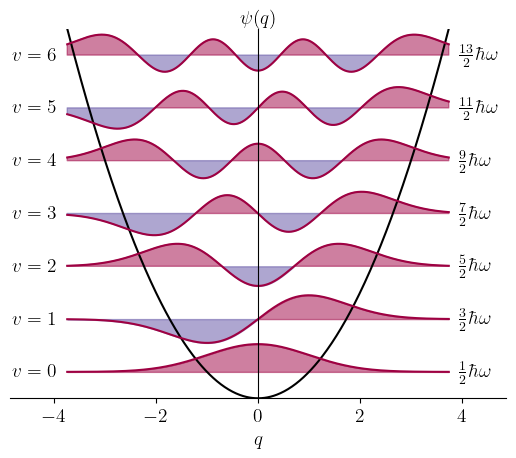

In [2]:
import numpy as np
from matplotlib import rc
from scipy.special import factorial
import matplotlib.pyplot as plt


rc('font', **{'family': 'serif', 'serif': ['Computer Modern'], 'size': 14})
rc('text', usetex=True)

# PLOT_PROB=False plots the wavefunction, psi; PLOT_PROB=True plots |psi|^2
PLOT_PROB = False

# Maximum vibrational quantum number to calculate wavefunction for
VMAX = 6

# Some appearance settings
# Pad the q-axis on each side of the maximum turning points by this fraction
QPAD_FRAC = 1.3
# Scale the wavefunctions by this much so they don't overlap
SCALING = 0.7
# Colours of the positive and negative parts of the wavefunction
COLOUR1 = (0.6196, 0.0039, 0.2588, 1.0)
COLOUR2 = (0.3686, 0.3098, 0.6353, 1.0)

# Normalization constant and energy for vibrational state v
N = lambda v: 1./np.sqrt(np.sqrt(np.pi)*2**v*factorial(v))
get_E = lambda v: v + 0.5

def make_Hr():
    """Return a list of np.poly1d objects representing Hermite polynomials."""

    # Define the Hermite polynomials up to order VMAX by recursion:
    # H_[v] = 2qH_[v-1] - 2(v-1)H_[v-2]
    Hr = [None] * (VMAX + 1)
    Hr[0] = np.poly1d([1.,])
    Hr[1] = np.poly1d([2., 0.])
    for v in range(2, VMAX+1):
        Hr[v] = Hr[1]*Hr[v-1] - 2*(v-1)*Hr[v-2]
    return Hr

Hr = make_Hr()

def get_psi(v, q):
    """Return the harmonic oscillator wavefunction for level v on grid q."""
    return N(v)*Hr[v](q)*np.exp(-q*q/2.)

def get_turning_points(v):
    """Return the classical turning points for state v."""
    qmax = np.sqrt(2. * get_E(v + 0.5))
    return -qmax, qmax

def get_potential(q):
    """Return potential energy on scaled oscillator displacement grid q."""
    return q**2 / 2


fig, ax = plt.subplots()
qmin, qmax = get_turning_points(VMAX)
xmin, xmax = QPAD_FRAC * qmin, QPAD_FRAC * qmax
q = np.linspace(qmin, qmax, 500)
V = get_potential(q)

def plot_func(ax, f, scaling=1, yoffset=0):
    """Plot f*scaling with offset yoffset.

    The curve above the offset is filled with COLOUR1; the curve below is
    filled with COLOUR2.

    """
    ax.plot(q, f*scaling + yoffset, color=COLOUR1)
    ax.fill_between(q, f*scaling + yoffset, yoffset, f > 0.,
                    color=COLOUR1, alpha=0.5)
    ax.fill_between(q, f*scaling + yoffset, yoffset, f < 0.,
                    color=COLOUR2, alpha=0.5)

# Plot the potential, V(q).
ax.plot(q, V, color='k', linewidth=1.5)

# Plot each of the wavefunctions (or probability distributions) up to VMAX.
for v in range(VMAX+1):
    psi_v = get_psi(v, q)
    E_v = get_E(v)
    if PLOT_PROB:
        plot_func(ax, psi_v**2, scaling=SCALING*1.5, yoffset=E_v)
    else:
        plot_func(ax, psi_v, scaling=SCALING, yoffset=E_v)
    # The energy, E = (v+0.5).hbar.omega.
    ax.text(s=r'$\frac{{{}}}{{2}}\hbar\omega$'.format(2*v+1), x=qmax+0.2,
            y=E_v, va='center')
    # Label the vibrational levels.
    ax.text(s=r'$v={}$'.format(v), x=qmin-0.2, y=E_v, va='center', ha='right')

# The top of the plot, plus a bit.
ymax = E_v+0.5

if PLOT_PROB:
    ylabel = r'$|\psi(q)|^2$'
else:
    ylabel = r'$\psi(q)$'
ax.text(s=ylabel, x=0, y=ymax, va='bottom', ha='center')

ax.set_xlabel('$q$')
ax.set_xlim(xmin, xmax)
ax.set_ylim(0, ymax)
ax.spines['left'].set_position('center')
ax.set_yticks([])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# plt.savefig('sho-psi{}-{}.png'.format(PLOT_PROB+1, VMAX))
plt.show()


In [ ]:
       message: The maximum number of mesh nodes is exceeded.
       success: False
        status: 1
             x: [-1.500e+00 -1.350e+00 ...  1.350e+00  1.500e+00]
           sol: <scipy.interpolate._interpolate.PPoly object at 0x7f5acffb1800>
             p: [ 3.444e+00]
             y: [[-7.296e-23  2.059e-04 ...  2.168e-04  7.191e-25]
                 [ 1.000e-03  2.224e-03 ... -2.343e-03 -1.053e-03]]
            yp: [[ 1.000e-03  2.224e-03 ... -2.343e-03 -1.053e-03]
                 [-6.793e-21  1.917e-02 ...  2.019e-02  6.696e-23]]
 rms_residuals: [ 2.295e-04  7.661e-04 ...  8.052e-04  2.416e-04]
         niter: 3